In [2]:
import numpy as np 
import pandas as pd
import os
import gc
import gzip
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# for sims of short tube


z_min = -256
z_max = 227
x_min = 0
x_max = 107.015
y_min = 0
y_max = 123.571
x_len = x_max - x_min
y_len = y_max - y_min
z_len = z_max - z_min
nBins = (z_len * 5) + 1
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

# Set parent directory containing allsimulations to be analyzed 
parentDir = "../analytic_v2/gap_100/"
allWaterArr = []
# loop over all simulation folders
for simDir in sorted(os.listdir(parentDir)):
    waterArr = []
    # data is expected to be in a folder titled pressure
    dataDir = parentDir+simDir
    for step in os.listdir(dataDir):
        waterArr.append(dataDir+"/"+step)
    if waterArr:
        allWaterArr.append(waterArr)
    else:
        print("No water array created for: " + dataDir)
print(allWaterArr)

[['../analytic_v2/gap_100/pressure/pressuredata.10000.gz', '../analytic_v2/gap_100/pressure/pressuredata.100000.gz', '../analytic_v2/gap_100/pressure/pressuredata.105000.gz', '../analytic_v2/gap_100/pressure/pressuredata.110000.gz', '../analytic_v2/gap_100/pressure/pressuredata.115000.gz', '../analytic_v2/gap_100/pressure/pressuredata.120000.gz', '../analytic_v2/gap_100/pressure/pressuredata.125000.gz', '../analytic_v2/gap_100/pressure/pressuredata.130000.gz', '../analytic_v2/gap_100/pressure/pressuredata.135000.gz', '../analytic_v2/gap_100/pressure/pressuredata.140000.gz', '../analytic_v2/gap_100/pressure/pressuredata.145000.gz', '../analytic_v2/gap_100/pressure/pressuredata.15000.gz', '../analytic_v2/gap_100/pressure/pressuredata.150000.gz', '../analytic_v2/gap_100/pressure/pressuredata.155000.gz', '../analytic_v2/gap_100/pressure/pressuredata.160000.gz', '../analytic_v2/gap_100/pressure/pressuredata.165000.gz', '../analytic_v2/gap_100/pressure/pressuredata.170000.gz', '../analytic_v

In [2]:
# for sims of short tube


z_min = -117
z_max = 207
x_min = 0
x_max = 100
y_min = 0
y_max = 100
x_len = x_max - x_min
y_len = y_max - y_min
z_len = z_max - z_min
nBins = (z_len * 5) + 1
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

# Set parent directory containing all simulations to be analyzed 
parentDir = "../analytic_v2/short_tube20/"
allWaterArr = []
# loop over all simulation folders
for simDir in os.listdir(parentDir):
    waterArr = []
    # data is expected to be in a folder titled pressure
    dataDir = parentDir+simDir
    for step in os.listdir(dataDir):
        waterArr.append(dataDir+"/"+step)
    if waterArr:
        allWaterArr.append(waterArr)
    else:
        print("No water array created for: " + dataDir)
print(allWaterArr)

[['../analytic_v2/short_tube20/water/pressuredata.100000.gz', '../analytic_v2/short_tube20/water/pressuredata.105000.gz', '../analytic_v2/short_tube20/water/pressuredata.110000.gz', '../analytic_v2/short_tube20/water/pressuredata.115000.gz', '../analytic_v2/short_tube20/water/pressuredata.120000.gz', '../analytic_v2/short_tube20/water/pressuredata.125000.gz', '../analytic_v2/short_tube20/water/pressuredata.130000.gz', '../analytic_v2/short_tube20/water/pressuredata.135000.gz', '../analytic_v2/short_tube20/water/pressuredata.140000.gz', '../analytic_v2/short_tube20/water/pressuredata.145000.gz', '../analytic_v2/short_tube20/water/pressuredata.150000.gz', '../analytic_v2/short_tube20/water/pressuredata.155000.gz', '../analytic_v2/short_tube20/water/pressuredata.160000.gz', '../analytic_v2/short_tube20/water/pressuredata.165000.gz', '../analytic_v2/short_tube20/water/pressuredata.170000.gz', '../analytic_v2/short_tube20/water/pressuredata.175000.gz', '../analytic_v2/short_tube20/water/pre

In [15]:
i=0
# loop through arrays of file names containing data to be analyzed
for waterArr in allWaterArr:
    if i != 0:
        i+=1
        continue  
    timesteps = []
    waterdfs = []
    print(waterArr[0])  
    for waterFile in waterArr:
        print(waterFile)
        with gzip.open(waterFile) as f:
            f.readline().rstrip()
            timestep = f.readline().rstrip().decode("utf-8") 
        timesteps.append(timestep)
        idf = pd.read_csv(waterFile).iloc[7:,:]
        dfCols = idf.iloc[0,].str.split(' ')[0]
        del dfCols[0:2]
        df = idf.iloc[1:,:]['ITEM: TIMESTEP'].str.split(' ', expand=True)
        df.set_axis(dfCols,axis=1,inplace=True)
        df.reset_index(drop=True, inplace=True)
        df = df.apply(pd.to_numeric)
        df = df[df.type != 17]
        waterdfs.append(df)
    i+=1

../analytic_v2/gap10_100/pressure/pressuredata.10000.gz
../analytic_v2/gap10_100/pressure/pressuredata.10000.gz
../analytic_v2/gap10_100/pressure/pressuredata.100000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1000000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1005000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1010000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1015000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1020000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1025000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1030000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1035000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1040000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1045000.gz
../analytic_v2/gap10_100/pressure/pressuredata.105000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1050000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1055000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1060000.gz
../analytic_v2/gap10

../analytic_v2/gap10_100/pressure/pressuredata.1630000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1635000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1640000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1645000.gz
../analytic_v2/gap10_100/pressure/pressuredata.165000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1650000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1655000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1660000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1665000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1670000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1675000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1680000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1685000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1690000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1695000.gz
../analytic_v2/gap10_100/pressure/pressuredata.170000.gz
../analytic_v2/gap10_100/pressure/pressuredata.1700000.gz
../analytic_v2/g

../analytic_v2/gap10_100/pressure/pressuredata.675000.gz
../analytic_v2/gap10_100/pressure/pressuredata.680000.gz
../analytic_v2/gap10_100/pressure/pressuredata.685000.gz
../analytic_v2/gap10_100/pressure/pressuredata.690000.gz
../analytic_v2/gap10_100/pressure/pressuredata.695000.gz
../analytic_v2/gap10_100/pressure/pressuredata.70000.gz
../analytic_v2/gap10_100/pressure/pressuredata.700000.gz
../analytic_v2/gap10_100/pressure/pressuredata.705000.gz
../analytic_v2/gap10_100/pressure/pressuredata.710000.gz
../analytic_v2/gap10_100/pressure/pressuredata.715000.gz
../analytic_v2/gap10_100/pressure/pressuredata.720000.gz
../analytic_v2/gap10_100/pressure/pressuredata.725000.gz
../analytic_v2/gap10_100/pressure/pressuredata.730000.gz
../analytic_v2/gap10_100/pressure/pressuredata.735000.gz
../analytic_v2/gap10_100/pressure/pressuredata.740000.gz
../analytic_v2/gap10_100/pressure/pressuredata.745000.gz
../analytic_v2/gap10_100/pressure/pressuredata.75000.gz
../analytic_v2/gap10_100/pressure

In [16]:
for df in waterdfs:
    df = df[df.type != 3]

In [11]:
# for sims of just water


z_min = -80
z_max = 80
x_min = 0
x_max = 80
y_min = 0
y_max = 80
x_len = x_max - x_min
y_len = y_max - y_min
z_len = z_max - z_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

# Set parent directory containing all simulations to be analyzed 
parentDir = "../analytic_v2/"
allWaterArr = []
# loop over all simulation folders
for simDir in os.listdir(parentDir):
    waterArr = []
    # data is expected to be in a folder titled pressure
    try:
        dataDir = parentDir+simDir+"/pressure"
        for step in os.listdir(dataDir):
            waterArr.append(dataDir+"/"+step)
        if waterArr:
            allWaterArr.append(waterArr)
        else:
            print("No water data present in : " + parentDir+simDir)
    except:
        print("No water array created for : " + parentDir+simDir)
        continue

No water array created for : ../analytic_v2/short_tube20
No water array created for : ../analytic_v2/short_tube20_perm


In [29]:
i=0
# loop through arrays of file names containing data to be analyzed
for waterArr in allWaterArr:
    if i != 0:
        i+=1
        continue  
    timesteps = []
    waterdfs = []
    print(waterArr[0])  
    for waterFile in waterArr:
        print(waterFile)
        with gzip.open(waterFile) as f:
            f.readline().rstrip()
            timestep = f.readline().rstrip().decode("utf-8") 
        timesteps.append(timestep)
        idf = pd.read_csv(waterFile).iloc[7:,:]
        dfCols = idf.iloc[0,].str.split(' ')[0]
        del dfCols[0:2]
        df = idf.iloc[1:,:]['ITEM: TIMESTEP'].str.split(' ', expand=True)
        df.set_axis(dfCols,axis=1,inplace=True)
        df.reset_index(drop=True, inplace=True)
        df = df.apply(pd.to_numeric)
        df = df[df.type != 3]
        waterdfs.append(df)
    i+=1


../analytic_v2/gap_100/pressure/pressuredata.10000.gz
../analytic_v2/gap_100/pressure/pressuredata.10000.gz
../analytic_v2/gap_100/pressure/pressuredata.100000.gz
../analytic_v2/gap_100/pressure/pressuredata.105000.gz
../analytic_v2/gap_100/pressure/pressuredata.110000.gz
../analytic_v2/gap_100/pressure/pressuredata.115000.gz
../analytic_v2/gap_100/pressure/pressuredata.120000.gz
../analytic_v2/gap_100/pressure/pressuredata.125000.gz
../analytic_v2/gap_100/pressure/pressuredata.130000.gz
../analytic_v2/gap_100/pressure/pressuredata.135000.gz
../analytic_v2/gap_100/pressure/pressuredata.140000.gz
../analytic_v2/gap_100/pressure/pressuredata.145000.gz
../analytic_v2/gap_100/pressure/pressuredata.15000.gz
../analytic_v2/gap_100/pressure/pressuredata.150000.gz
../analytic_v2/gap_100/pressure/pressuredata.155000.gz
../analytic_v2/gap_100/pressure/pressuredata.160000.gz
../analytic_v2/gap_100/pressure/pressuredata.165000.gz
../analytic_v2/gap_100/pressure/pressuredata.170000.gz
../analytic_v

In [30]:
molPressureSeries = []
binPressureSeries = []
vorPressureSeries = []
densitySeries = []
vorDensitySeries=[]
    
tubemolPressureSeries = []
tubevorPressureSeries = []
tubevorDensitySeries = []
tubeCountSeries = []

gapvorPressureSeries = []
gapvorDensitySeries = []
gapCountSeries = []

nBins = (z_len * 1) + 1
bin_size = z_len/nBins
i=0
for df in waterdfs:
    allStepsSeries = []
    dfMol = pd.DataFrame()

    df['xmass'] = df['mass'] * df['x']
    df['ymass'] = df['mass'] * df['y']
    df['zmass'] = df['mass'] * df['z']

    # create per molecule dataframe to analyze at finer scale
    # atoms of a molecule are expected to be consecutive

    dfMol['mass'] = df['mass'].groupby(df.index // 3).sum()
    dfMol['xmass'] = df['xmass'].groupby(df.index // 3).sum()
    dfMol['ymass'] = df['ymass'].groupby(df.index // 3).sum()
    dfMol['zmass'] = df['zmass'].groupby(df.index // 3).sum()
    dfMol['x'] = dfMol['xmass'] / dfMol['mass']
    dfMol['y'] = dfMol['ymass'] / dfMol['mass']
    dfMol['z'] = dfMol['zmass'] / dfMol['mass']
    dfMol['r'] = (dfMol['x']**2 + dfMol['y']**2)**(1/2)
    dfMol['stressvol'] = df['v_peratompress'].groupby(df.index // 3).sum()
    dfMol['vol'] = df['c_peratomvol[1]'].groupby(df.index // 3).sum()
    dfMol['press'] = dfMol['stressvol'] / (-3 * dfMol['vol'])
    dfMol['density'] = (dfMol['mass'] / (x_len * y_len * z_len/nBins)) * ang3_to_cm3 / avo_num
    dfMol['pressbin'] = (dfMol['stressvol'] / (-3 * x_len * y_len * z_len/nBins))
    dfMol['bin'] = pd.cut(dfMol['z'], np.linspace(z_min,z_max,nBins),labels=False)
    dfMol['rbin'] = pd.cut(dfMol['r'].loc[(dfMol['z'] > 10) & (dfMol['z'] < 70)], np.linspace(0,20,20),labels=False)
    dfMol['ybin'] = pd.cut(dfMol['y'].loc[(dfMol['z'] > -35) & (dfMol['z'] < 35)], np.linspace(0,120,120),labels=False)
    stepDF_mean = dfMol.groupby(['bin'], dropna=True).mean()
    stepDF_sum = dfMol.groupby(['bin'], dropna=True).sum()
    tubeDF_mean = dfMol.groupby(['rbin'], dropna=True).mean()
    tubeDF_sum = dfMol.groupby(['rbin'], dropna=True).sum()
    tubeDF_sum['rbin_count'] = dfMol.groupby(['rbin'], dropna=True)['rbin'].count()
    
    gapDF_sum = dfMol.groupby(['ybin'], dropna=True).sum()
    gapDF_sum['ybin_count'] = dfMol.groupby(['ybin'], dropna=True)['ybin'].count()
    
    molPressureSeries.append(stepDF_mean['press'].rename(timesteps[i], axis=1))
    binPressureSeries.append(stepDF_sum['pressbin'].rename(timesteps[i], axis=1))
    vorPressureSeries.append(stepDF_sum['stressvol'].rename(timesteps[i], axis=1)/(-3*stepDF_sum['vol'].rename(timesteps[i], axis=1)))
    vorDensitySeries.append((stepDF_sum['mass'].rename(timesteps[i], axis=1)/(stepDF_sum['vol'].rename(timesteps[i], axis=1)))* ang3_to_cm3 / avo_num)
    densitySeries.append(stepDF_sum['density'].rename(timesteps[i], axis=1))
    
    tubeCountSeries.append(tubeDF_sum['rbin_count'].rename(timesteps[i], axis=1))
    tubemolPressureSeries.append(tubeDF_mean['press'].rename(timesteps[i], axis=1))
    tubevorPressureSeries.append(tubeDF_sum['stressvol'].rename(timesteps[i], axis=1)/(-3*tubeDF_sum['vol'].rename(timesteps[i], axis=1)))
    tubevorDensitySeries.append((tubeDF_sum['mass'].rename(timesteps[i], axis=1)/(tubeDF_sum['vol'].rename(timesteps[i], axis=1)))* ang3_to_cm3 / avo_num)
    
    gapCountSeries.append(gapDF_sum['ybin_count'].rename(timesteps[i], axis=1))
    gapvorPressureSeries.append(gapDF_sum['stressvol'].rename(timesteps[i], axis=1)/(-3*gapDF_sum['vol'].rename(timesteps[i], axis=1)))
    gapvorDensitySeries.append((gapDF_sum['mass'].rename(timesteps[i], axis=1)/(gapDF_sum['vol'].rename(timesteps[i], axis=1)))* ang3_to_cm3 / avo_num)
    
    i += 1

molPressureSeriesDF = pd.concat(molPressureSeries, axis=1, ignore_index=False)
binPressureSeriesDF = pd.concat(binPressureSeries, axis=1, ignore_index=False)
vorPressureSeriesDF = pd.concat(vorPressureSeries, axis=1, ignore_index=False)
densitySeriesDF = pd.concat(densitySeries,axis=1, ignore_index=False)
vorDensitySeriesDF = pd.concat(vorDensitySeries,axis=1, ignore_index=False)


tubeCountSeriesDF = pd.concat(tubeCountSeries, axis=1, ignore_index=False)
tubemolPressureSeriesDF = pd.concat(tubemolPressureSeries, axis=1, ignore_index=False)
tubevorPressureSeriesDF = pd.concat(tubevorPressureSeries, axis=1, ignore_index=False)
tubevorDensitySeriesDF = pd.concat(tubevorDensitySeries,axis=1, ignore_index=False)

gapCountSeriesDF = pd.concat(gapCountSeries, axis=1, ignore_index=False)
gapvorPressureSeriesDF = pd.concat(gapvorPressureSeries, axis=1, ignore_index=False)
gapvorDensitySeriesDF = pd.concat(gapvorDensitySeries,axis=1, ignore_index=False)


AVGmolPressureSeriesDF = pd.DataFrame()
AVGbinPressureSeriesDF = pd.DataFrame()
AVGvorPressureSeriesDF = pd.DataFrame()
AVGdensitySeriesDF = pd.DataFrame()
AVGvorDensitySeriesDF = pd.DataFrame()

AVGtubeCountSeriesDF = pd.DataFrame()
AVGtubemolPressureSeriesDF = pd.DataFrame()
AVGtubevorPressureSeriesDF = pd.DataFrame()
AVGtubevorDensitySeriesDF = pd.DataFrame()

AVGgapCountSeriesDF = pd.DataFrame()
AVGgapvorPressureSeriesDF = pd.DataFrame()
AVGgapvorDensitySeriesDF = pd.DataFrame()


AVGgapCountSeriesDF['mean'] = gapCountSeriesDF.mean(axis=1)
AVGgapCountSeriesDF['stdev'] = gapCountSeriesDF.std(axis=1)
AVGgapvorPressureSeriesDF['mean'] = gapvorPressureSeriesDF.mean(axis=1)
AVGgapvorPressureSeriesDF['stdev'] = gapvorPressureSeriesDF.std(axis=1)
AVGgapvorDensitySeriesDF['mean'] = gapvorDensitySeriesDF.mean(axis=1)
AVGgapvorDensitySeriesDF['stdev'] = gapvorDensitySeriesDF.std(axis=1)



AVGtubeCountSeriesDF['mean'] = tubeCountSeriesDF.mean(axis=1)
AVGtubeCountSeriesDF['stdev'] = tubeCountSeriesDF.std(axis=1)
AVGtubevorPressureSeriesDF['mean'] = tubevorPressureSeriesDF.mean(axis=1)
AVGtubevorPressureSeriesDF['stdev'] = tubevorPressureSeriesDF.std(axis=1)
AVGtubemolPressureSeriesDF['mean'] = tubemolPressureSeriesDF.mean(axis=1)
AVGtubemolPressureSeriesDF['stdev'] = tubemolPressureSeriesDF.std(axis=1)
AVGtubevorDensitySeriesDF['mean'] = tubevorDensitySeriesDF.mean(axis=1)
AVGtubevorDensitySeriesDF['stdev'] = tubevorDensitySeriesDF.std(axis=1)

AVGvorPressureSeriesDF['mean'] = vorPressureSeriesDF.mean(axis=1)
AVGvorPressureSeriesDF['stdev'] = vorPressureSeriesDF.std(axis=1)

AVGmolPressureSeriesDF['mean'] = molPressureSeriesDF.mean(axis=1)
AVGmolPressureSeriesDF['stdev'] = molPressureSeriesDF.std(axis=1)

AVGbinPressureSeriesDF['mean'] = binPressureSeriesDF.mean(axis=1)
AVGbinPressureSeriesDF['stdev'] = binPressureSeriesDF.std(axis=1)

AVGdensitySeriesDF['mean'] = densitySeriesDF.mean(axis=1)
AVGdensitySeriesDF['stdev'] = densitySeriesDF.std(axis=1)

AVGvorDensitySeriesDF['mean'] = vorDensitySeriesDF.mean(axis=1)
AVGvorDensitySeriesDF['stdev'] = vorDensitySeriesDF.std(axis=1)

vorPressureSeriesDF.index.names = ['Distance in z (Å)']
AVGvorPressureSeriesDF.index.names = ['Distance in z (Å)']
binPressureSeriesDF.index.names = ['Distance in z (Å)']
AVGbinPressureSeriesDF.index.names = ['Distance in z (Å)']
molPressureSeriesDF.index.names = ['Distance in z (Å)']
AVGmolPressureSeriesDF.index.names = ['Distance in z (Å)']
densitySeriesDF.index.names = ['Distance in z (Å)']
AVGdensitySeriesDF.index.names = ['Distance in z (Å)']
vorDensitySeriesDF.index.names = ['Distance in z (Å)']
AVGvorDensitySeriesDF.index.names = ['Distance in z (Å)']


tubeCountSeriesDF.index.names = ['Distance in r (Å)']
AVGtubeCountSeriesDF.index.names = ['Distance in r (Å)']
tubevorPressureSeriesDF.index.names = ['Distance in r (Å)']
AVGtubevorPressureSeriesDF.index.names = ['Distance in r (Å)']
tubemolPressureSeriesDF.index.names = ['Distance in r (Å)']
AVGtubemolPressureSeriesDF.index.names = ['Distance in r (Å)']
tubevorDensitySeriesDF.index.names = ['Distance in r (Å)']
AVGtubevorDensitySeriesDF.index.names = ['Distance in r (Å)']

gapCountSeriesDF.index.names = ['Distance in y (Å)']
AVGgapCountSeriesDF.index.names = ['Distance in y (Å)']
gapvorPressureSeriesDF.index.names = ['Distance in y (Å)']
AVGgapvorPressureSeriesDF.index.names = ['Distance in y (Å)']
gapvorDensitySeriesDF.index.names = ['Distance in y (Å)']
AVGgapvorDensitySeriesDF.index.names = ['Distance in y (Å)']

vorPressureSeriesDF.set_index(vorPressureSeriesDF.index*bin_size,inplace=True)
AVGvorPressureSeriesDF.set_index(AVGvorPressureSeriesDF.index*bin_size,inplace=True)
molPressureSeriesDF.set_index(molPressureSeriesDF.index*bin_size,inplace=True)
AVGmolPressureSeriesDF.set_index(AVGmolPressureSeriesDF.index*bin_size,inplace=True)
binPressureSeriesDF.set_index(binPressureSeriesDF.index*bin_size,inplace=True)
AVGbinPressureSeriesDF.set_index(AVGbinPressureSeriesDF.index*bin_size,inplace=True)
densitySeriesDF.set_index(densitySeriesDF.index*bin_size,inplace=True)
AVGdensitySeriesDF.set_index(AVGdensitySeriesDF.index*bin_size,inplace=True)
vorDensitySeriesDF.set_index(vorDensitySeriesDF.index*bin_size,inplace=True)
AVGvorDensitySeriesDF.set_index(AVGvorDensitySeriesDF.index*bin_size,inplace=True)

488.93106941098347
332.27832410264165
mean      719.951130
stdev    1689.568282
dtype: float64


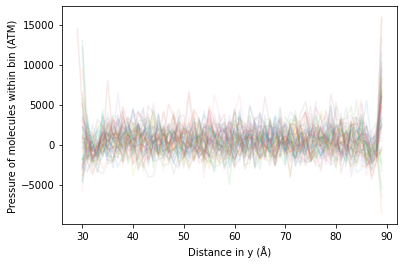

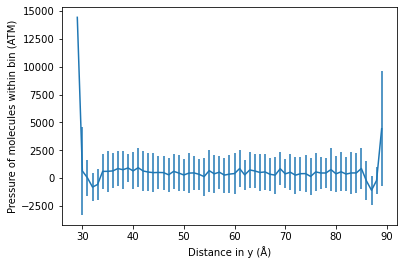

In [75]:
gapvorPressureSeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/tube_counts_all_ts.jpg',bbox_inches='tight')
AVGgapvorPressureSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
plt.savefig('./plots/gap_pressure_avg.jpg',bbox_inches='tight')
print(gapvorPressureSeriesDF.mean().mean())
print(gapvorPressureSeriesDF.mean().std())
print(AVGgapvorPressureSeriesDF.mean())

0.980262438780917
0.03868454395239409
mean     0.979863
stdev    0.051872
dtype: float64


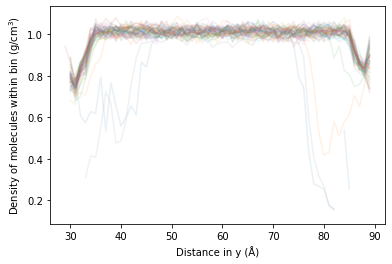

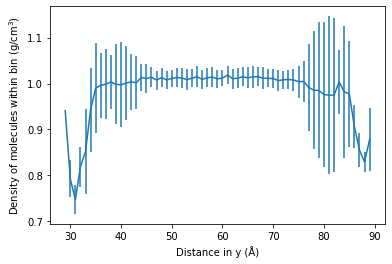

In [76]:
gapvorDensitySeriesDF.plot(alpha=0.1, legend=False, ylabel='Density of molecules within bin (g/cm$^3$)')
# plt.savefig('./plots/tube_counts_all_ts.jpg',bbox_inches='tight')
AVGgapvorDensitySeriesDF.plot(yerr='stdev',legend=False, ylabel='Density of molecules within bin (g/cm$^3$)')
plt.savefig('./plots/gap_density_avg.jpg',bbox_inches='tight')
print(gapvorDensitySeriesDF.mean().mean())
print(gapvorDensitySeriesDF.mean().std())
print(AVGgapvorDensitySeriesDF.mean())

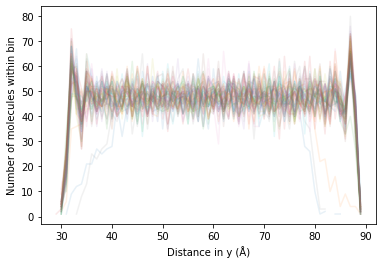

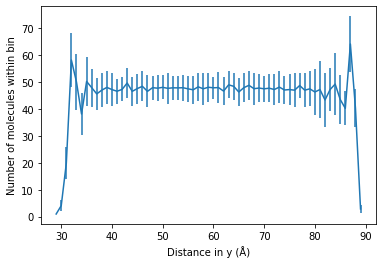

In [77]:
gapCountSeriesDF.plot(alpha=0.1, legend=False, ylabel='Number of molecules within bin')
# plt.savefig('./plots/tube_counts_all_ts.jpg',bbox_inches='tight')
AVGgapCountSeriesDF.plot(yerr='stdev',legend=False, ylabel='Number of molecules within bin')
plt.savefig('./plots/gap_counts_avg.jpg',bbox_inches='tight')

0.9564593543407788
0.009342523026223855
mean     0.956459
stdev    0.019743
dtype: float64


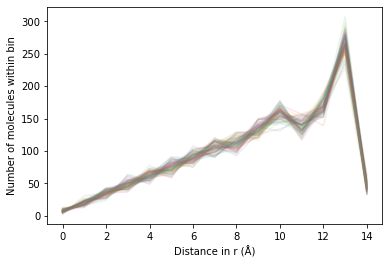

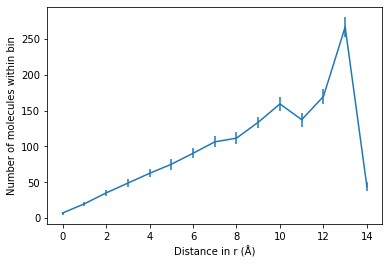

In [20]:
tubeCountSeriesDF.plot(alpha=0.1, legend=False, ylabel='Number of molecules within bin')
plt.savefig('./plots/tube_counts_all_ts.jpg',bbox_inches='tight')
AVGtubeCountSeriesDF.plot(yerr='stdev',legend=False, ylabel='Number of molecules within bin')
plt.savefig('./plots/tube_counts_avg.jpg',bbox_inches='tight')

0.9564593543407788
0.009342523026223855
mean     0.956459
stdev    0.019743
dtype: float64


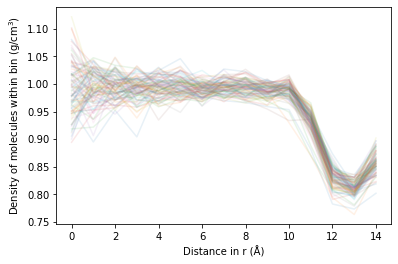

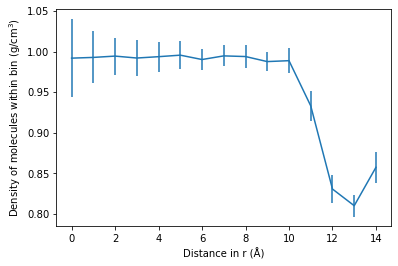

In [28]:
tubevorDensitySeriesDF.plot(alpha=0.1, legend=False, ylabel='Density of molecules within bin (g/cm$^3$)')
plt.savefig('./plots/tube_density_all_ts.jpg',bbox_inches='tight')
AVGtubevorDensitySeriesDF.plot(yerr='stdev',legend=False, ylabel='Density of molecules within bin (g/cm$^3$)')
plt.savefig('./plots/tube_density_avg.jpg',bbox_inches='tight')
print(tubevorDensitySeriesDF.mean().mean())
print(tubevorDensitySeriesDF.mean().std())
print(AVGtubevorDensitySeriesDF.mean())

202.9511370819505
598.7286468085202
mean      202.951137
stdev    1455.283345
dtype: float64


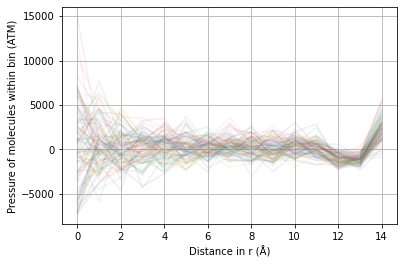

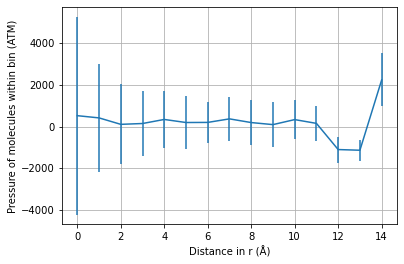

In [29]:
tubevorPressureSeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)',grid=True)
plt.savefig('./plots/tube_pressure_all_ts.jpg',bbox_inches='tight')
AVGtubevorPressureSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)',grid=True)
plt.savefig('./plots/tube_pressure_avg.jpg',bbox_inches='tight')
print(tubevorPressureSeriesDF.mean().mean())
print(tubevorPressureSeriesDF.mean().std())
print(AVGtubevorPressureSeriesDF.mean())

601.3995206331946
523.4169529541277
mean      601.399521
stdev    1313.840285
dtype: float64


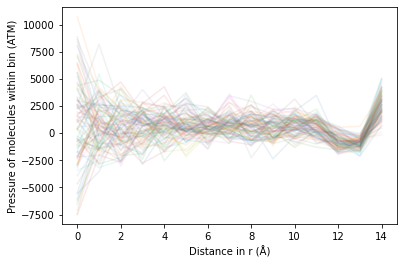

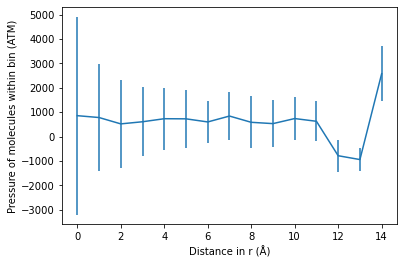

In [21]:
tubemolPressureSeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGtubemolPressureSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')

print(tubemolPressureSeriesDF.mean().mean())
print(tubemolPressureSeriesDF.mean().std())
print(AVGtubemolPressureSeriesDF.mean())

-72.81315944062108
36.634119957452086
mean    -103.648181
stdev    515.825083
dtype: float64


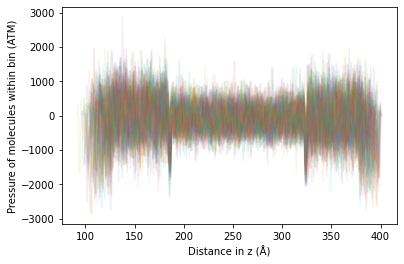

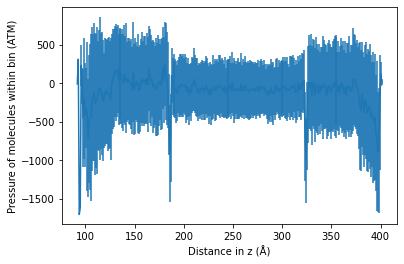

In [42]:
binPressureSeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGbinPressureSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_avg.jpg',bbox_inches='tight')


print(binPressureSeriesDF.mean().mean())
print(binPressureSeriesDF.mean().std())
print(AVGbinPressureSeriesDF.mean())

-64.50339456596868
35.91474088303412
mean     -64.503395
stdev    443.254170
dtype: float64


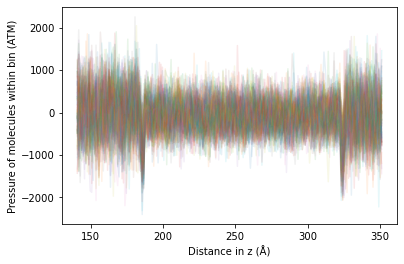

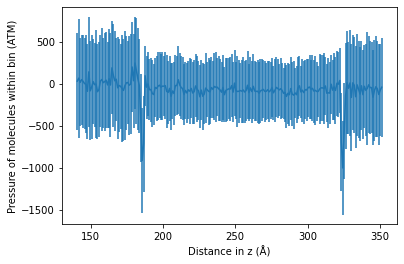

In [43]:
binPressureSeriesDF.iloc[49:-50].plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGbinPressureSeriesDF.iloc[49:-50].plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_avg.jpg',bbox_inches='tight')


print(binPressureSeriesDF.iloc[49:-50].mean().mean())
print(binPressureSeriesDF.iloc[49:-50].mean().std())
print(AVGbinPressureSeriesDF.iloc[49:-50].mean())

339.56160253142633
46.60594049834649
mean     361.738910
stdev    761.691033
dtype: float64


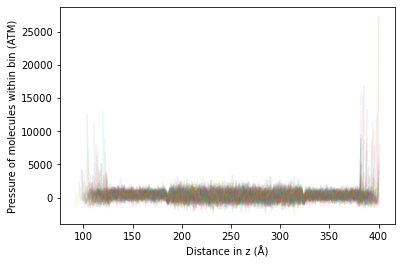

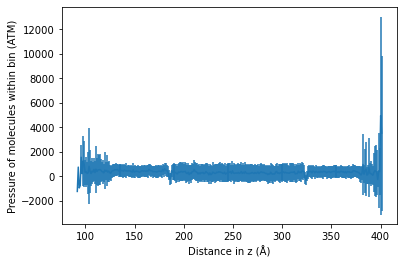

In [44]:
molPressureSeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGmolPressureSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_avg.jpg',bbox_inches='tight')


print(molPressureSeriesDF.mean().mean())
print(molPressureSeriesDF.mean().std())
print(AVGmolPressureSeriesDF.mean())

319.7563275739049
49.21924884524907
mean     319.756328
stdev    627.955851
dtype: float64


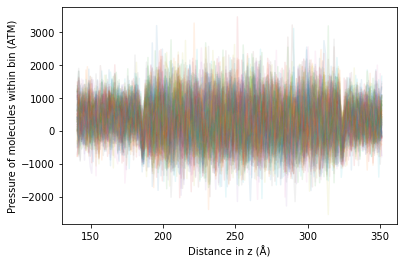

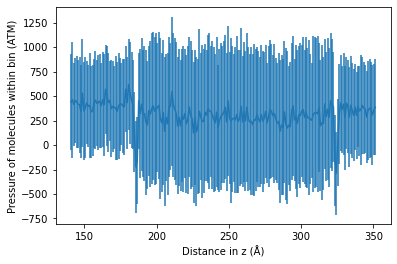

In [45]:
molPressureSeriesDF.iloc[49:-50].plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGmolPressureSeriesDF.iloc[49:-50].plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_avg.jpg',bbox_inches='tight')


print(molPressureSeriesDF.iloc[49:-50].mean().mean())
print(molPressureSeriesDF.iloc[49:-50].mean().std())
print(AVGmolPressureSeriesDF.iloc[49:-50].mean())

-64.33475996781603
44.258567622402616
mean     -26.796119
stdev    730.709550
dtype: float64


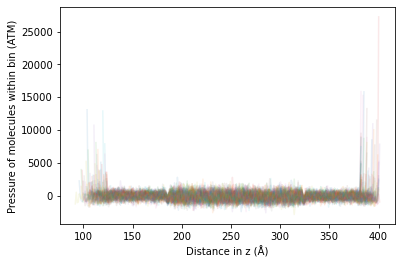

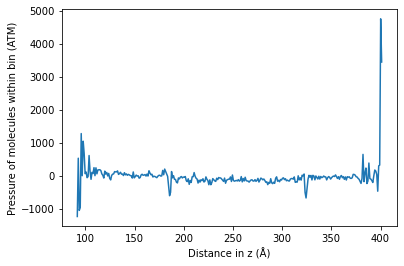

In [31]:
vorPressureSeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGvorPressureSeriesDF.plot(y='mean',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/gap_pressure_avg.jpg',bbox_inches='tight')


print(vorPressureSeriesDF.mean().mean())
print(vorPressureSeriesDF.mean().std())
print(AVGvorPressureSeriesDF.mean())

29.129185129834955
92.29152059559121
mean      29.129185
stdev    462.202814
dtype: float64


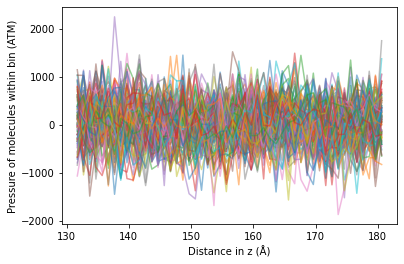

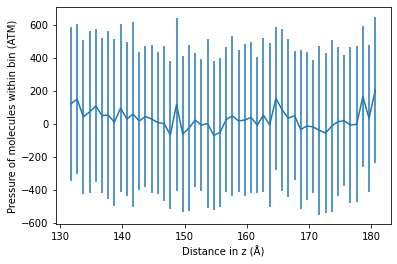

In [36]:
vorPressureSeriesDF.iloc[40:90].plot(alpha=0.5, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/gap_pressure_all_ts_trim.jpg',bbox_inches='tight')
AVGvorPressureSeriesDF.iloc[40:90].plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/gap_pressure_avg_trim.jpg',bbox_inches='tight')


print(vorPressureSeriesDF.iloc[40:90].mean().mean())
print(vorPressureSeriesDF.iloc[40:90].mean().std())
print(AVGvorPressureSeriesDF.iloc[40:90].mean())

-48.436664310564986
88.7876215487573
mean     -48.436664
stdev    459.833822
dtype: float64


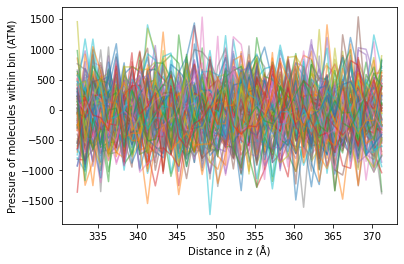

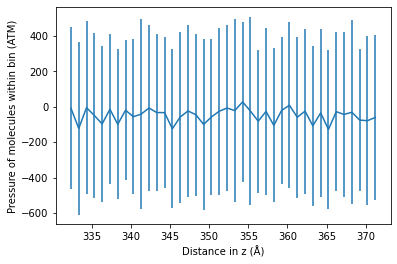

In [40]:
vorPressureSeriesDF.iloc[-70:-30].plot(alpha=0.5, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts_trim.jpg',bbox_inches='tight')
AVGvorPressureSeriesDF.iloc[-70:-30].plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/gap_pressure_avg_trim.jpg',bbox_inches='tight')


print(vorPressureSeriesDF.iloc[-70:-30].mean().mean())
print(vorPressureSeriesDF.iloc[-70:-30].mean().std())
print(AVGvorPressureSeriesDF.iloc[-70:-30].mean())

-127.16159031779176
63.03865463974145
mean    -127.161590
stdev    641.544263
dtype: float64


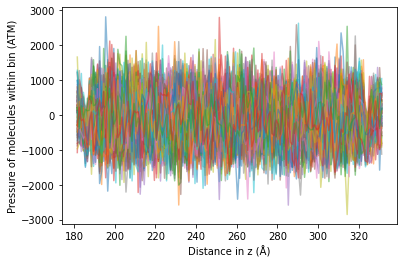

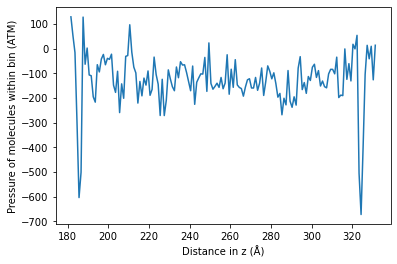

In [41]:
vorPressureSeriesDF.iloc[90:-70].plot(alpha=0.5, legend=False, ylabel='Pressure of molecules within bin (ATM)')
#plt.savefig('./plots/pressure_all_ts_trim.jpg',bbox_inches='tight')
AVGvorPressureSeriesDF.iloc[90:-70].plot(y='mean',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/gap_pressure_avg_trim.jpg',bbox_inches='tight')


print(vorPressureSeriesDF.iloc[90:-70].mean().mean())
print(vorPressureSeriesDF.iloc[90:-70].mean().std())
print(AVGvorPressureSeriesDF.iloc[90:-70].mean())

0.841595596113862
0.00853492321843146
mean     0.832201
stdev    0.119667
dtype: float64


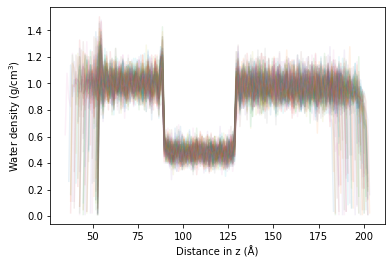

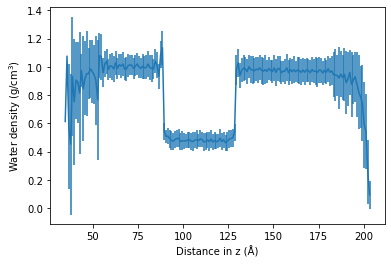

In [15]:
densitySeriesDF.plot(alpha=0.1, legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_all_ts.jpg',bbox_inches='tight')
AVGdensitySeriesDF.plot(yerr='stdev',legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_avg.jpg',bbox_inches='tight')


print(densitySeriesDF.mean().mean())
print(densitySeriesDF.mean().std())
print(AVGdensitySeriesDF.mean())

0.7056771709800213
0.006581668821432884
mean     0.705677
stdev    0.073104
dtype: float64


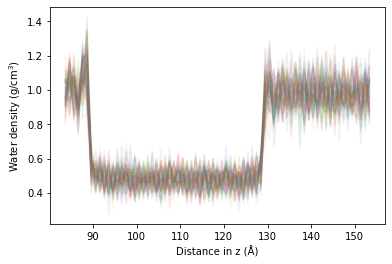

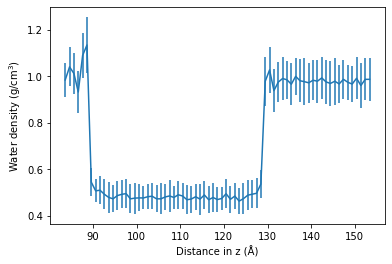

In [16]:
densitySeriesDF.iloc[49:-50].plot(alpha=0.1, legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_all_ts_trim.jpg',bbox_inches='tight')
AVGdensitySeriesDF.iloc[49:-50].plot(yerr='stdev',legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_avg_trim.jpg',bbox_inches='tight')


print(densitySeriesDF.iloc[49:-50].mean().mean())
print(densitySeriesDF.iloc[49:-50].mean().std())
print(AVGdensitySeriesDF.iloc[49:-50].mean())

0.9550148214320847
0.01129831937791627
mean     0.939936
stdev    0.035630
dtype: float64


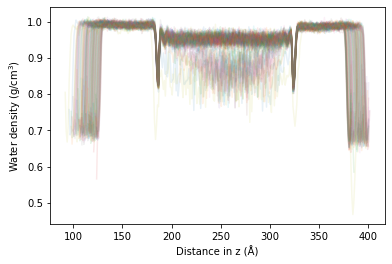

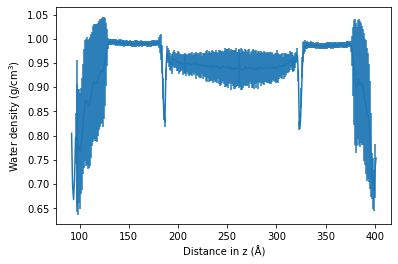

In [46]:
vorDensitySeriesDF.plot(alpha=0.1, legend=False, ylabel='Water density (g/cm$^3$)')
# plt.savefig('./plots/density_all_ts.jpg',bbox_inches='tight')
AVGvorDensitySeriesDF.plot(yerr='stdev',legend=False, ylabel='Water density (g/cm$^3$)')
# plt.savefig('./plots/density_avg.jpg',bbox_inches='tight')


print(vorDensitySeriesDF.mean().mean())
print(vorDensitySeriesDF.mean().std())
print(AVGvorDensitySeriesDF.mean())

0.962948810925252
0.0030904413523010666
mean     0.962949
stdev    0.018865
dtype: float64


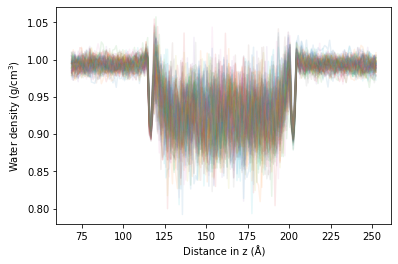

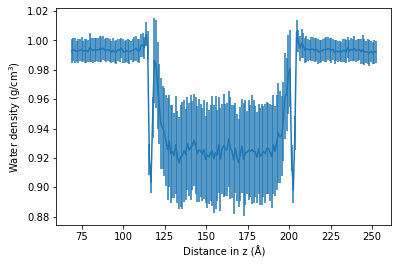

In [180]:
vorDensitySeriesDF.iloc[49:-50].plot(alpha=0.1, legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_all_ts_trim.jpg',bbox_inches='tight')
AVGvorDensitySeriesDF.iloc[49:-50].plot(yerr='stdev',legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_avg_trim.jpg',bbox_inches='tight')


print(vorDensitySeriesDF.iloc[49:-50].mean().mean())
print(vorDensitySeriesDF.iloc[49:-50].mean().std())
print(AVGvorDensitySeriesDF.iloc[49:-50].mean())

0.9702471295550752
0.007691491776812005
mean     0.970234
stdev    0.014443
dtype: float64


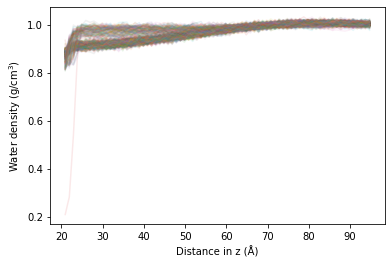

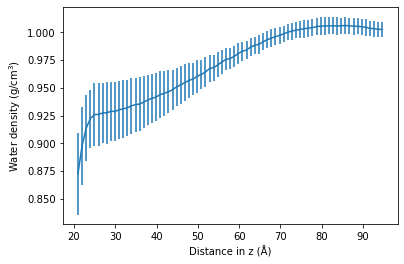

In [19]:
vorDensitySeriesDF.iloc[5:80].plot(alpha=0.1, legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_all_ts_trim.jpg',bbox_inches='tight')
AVGvorDensitySeriesDF.iloc[5:80].plot(yerr='stdev',legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_avg_trim.jpg',bbox_inches='tight')


print(vorDensitySeriesDF.iloc[5:80].mean().mean())
print(vorDensitySeriesDF.iloc[5:80].mean().std())
print(AVGvorDensitySeriesDF.iloc[5:80].mean())

0.8259633671936752
0.016792966439257026
mean     0.682736
stdev    0.202466
dtype: float64


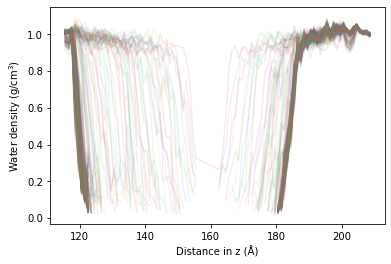

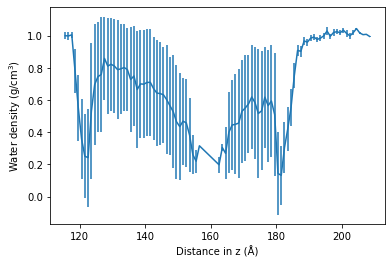

In [20]:
vorDensitySeriesDF.iloc[100:-101].plot(alpha=0.1, legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_all_ts_trim.jpg',bbox_inches='tight')
AVGvorDensitySeriesDF.iloc[100:-101].plot(yerr='stdev',legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_avg_trim.jpg',bbox_inches='tight')


print(vorDensitySeriesDF.iloc[100:-101].mean().mean())
print(vorDensitySeriesDF.iloc[100:-101].mean().std())
print(AVGvorDensitySeriesDF.iloc[100:-101].mean())

0.9340000706865211
0.01364444253673335
mean     0.933487
stdev    0.018523
dtype: float64


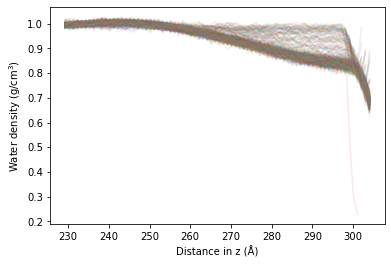

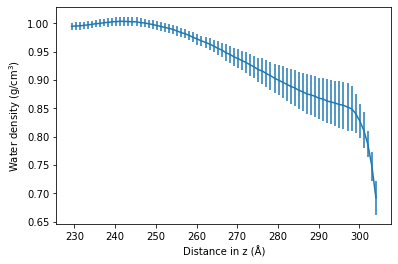

In [21]:
vorDensitySeriesDF.iloc[-81:-5].plot(alpha=0.1, legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_all_ts_trim.jpg',bbox_inches='tight')
AVGvorDensitySeriesDF.iloc[-81:-5].plot(yerr='stdev',legend=False, ylabel='Water density (g/cm$^3$)')
plt.savefig('./plots/density_avg_trim.jpg',bbox_inches='tight')


print(vorDensitySeriesDF.iloc[-81:-5].mean().mean())
print(vorDensitySeriesDF.iloc[-81:-5].mean().std())
print(AVGvorDensitySeriesDF.iloc[-81:-5].mean())